In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import add

In [2]:
df = pd.read_csv('Dataset.data', header=-1, delim_whitespace=True)

In [3]:
# Assigning Column Names
col = ['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']
df.columns = col

In [4]:
ind_Sex = pd.get_dummies(df['Sex'], prefix='Sex')

In [5]:
X = pd.concat([ind_Sex, df.select_dtypes(['float64'])], axis = 1)

In [6]:
def normalize(df):
    for cat, value in df.iteritems():
        df[cat] = (df[cat].values - np.mean(df[cat].values))/np.std(df[cat].values)
    return df

In [7]:
X_norm = normalize(X)

In [8]:
X_norm['Intercept'] = np.ones(4177)

In [9]:
# Target Variable
y = df['Rings'].values

In [10]:
np.random.seed(10)
theta_t = np.random.rand(11)
alpha = 0.01
def gradient_descent(X, y, alpha, theta_t):
    costs = [] #Updated Error
    theta_j = []
    for i in range(1000):
        hypo = np.dot(X, theta_t)
        cost_func = (1/(2*4177)) * np.dot((hypo-y).T, (hypo-y))
        costs.append(cost_func)
        theta_t = theta_t - (alpha * (1/4177) * np.dot(X.T, (hypo-y)))
        theta_j.append(theta_t)
    return costs, theta_j

In [11]:
costs, theta_j = gradient_descent(X_norm, y, alpha, theta_t)

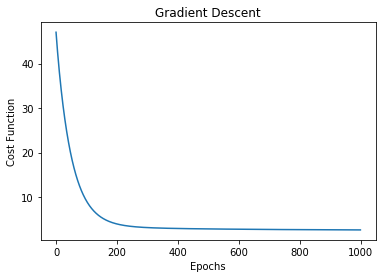

In [12]:
plt.plot(costs)
plt.title('Gradient Descent')
plt.ylabel('Cost Function')
plt.xlabel('Epochs')
plt.show()